# Plotscript for Voxel Downsampling Data

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

df_1 = pd.read_excel('voxelsize_resampling_results.xlsx')
df_2 = pd.read_excel('tau_geodict_results.xlsx')
df = pd.merge(df_1, df_2) # merge tortuosity and the other data
df

,voxelsizes,va_pore_orig,va_cb_orig,va_am_orig,pore,carbon black,active material,active surface,tortuosity
0,70,0.342303,0.071651,0.586046,0.342233,0.071731,0.586035,0.747253,1.608097
1,140,0.331510,0.092325,0.576159,0.331348,0.092513,0.576139,0.495992,1.599587
2,280,0.323205,0.109142,0.567651,0.322943,0.109450,0.567607,0.410090,1.668514
3,560,0.308551,0.139070,0.552379,0.308313,0.139362,0.552325,0.327971,1.773885
4,1120,0.284108,0.188640,0.527252,0.283903,0.188865,0.527231,0.248203,1.983620


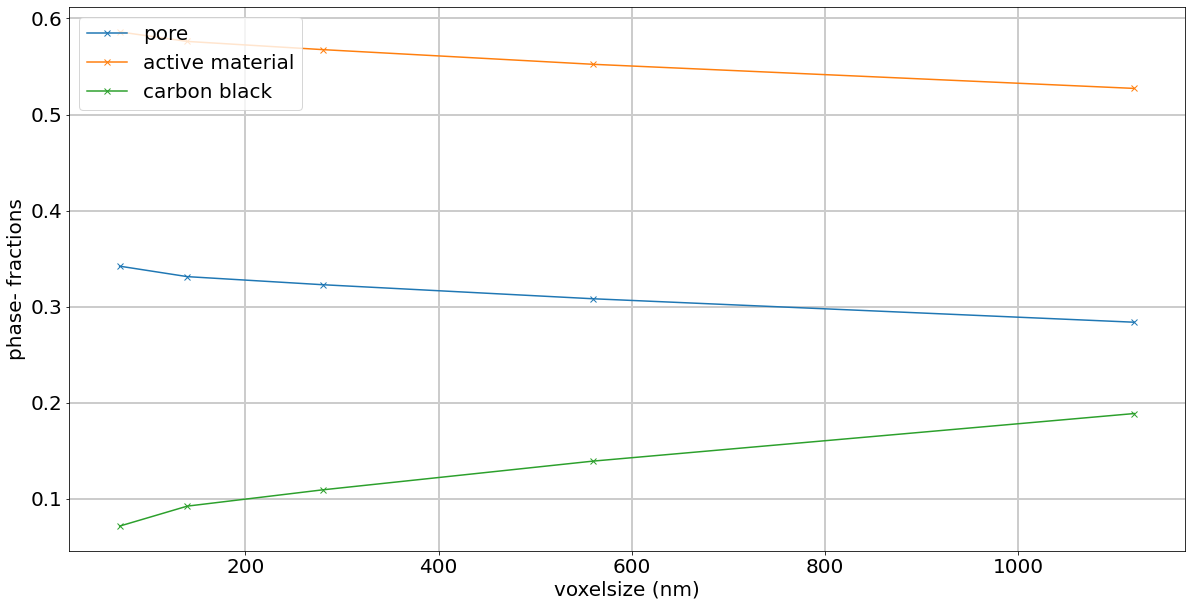

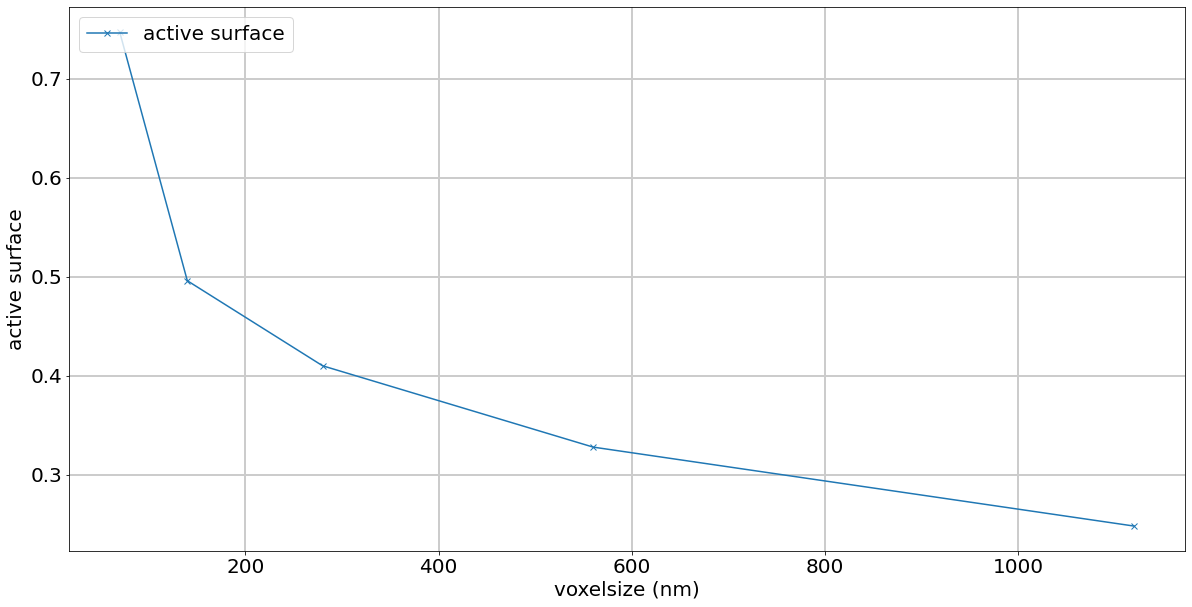

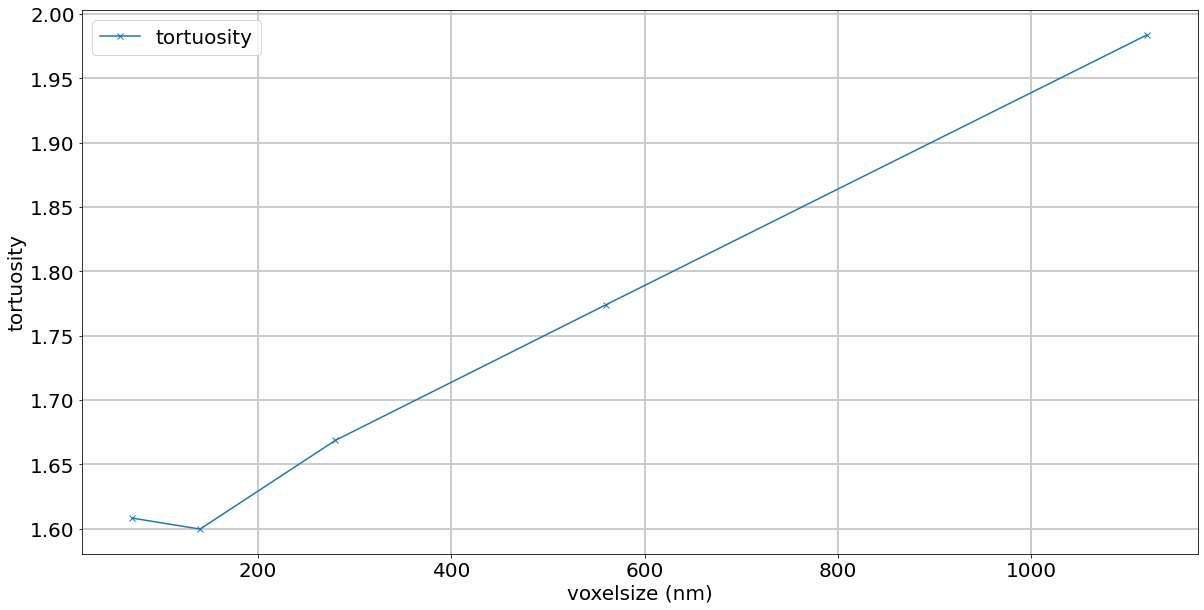

In [7]:
def make_scatter_plot (df_ir, x_axis_label, y_axis_label):
    '''
    takes df as input and plots firs column as x-axis and the resulting columns on top of each other
    '''
    save_name = x_axis_label + ' versus ' + y_axis_label #name to be saved later on
    plt.figure(figsize = (20, 10))#figure size
    
    headers = df_ir.columns.values
    x = headers[0]#set as x-axis
    for i in enumerate(headers):
        if i[0] > 0:
            c = i[1]
            plt.plot(df_ir[x], df_ir[c], label = c, marker = 'x')
    label_size = 20
    
    plt.grid(True, color='0.8', linestyle='-', linewidth=2)
    plt.xticks(fontsize=label_size)
    plt.yticks(fontsize=label_size)
    plt.xlabel(x_axis_label, fontsize=label_size)
    plt.ylabel(y_axis_label, fontsize=label_size)
    
    plt.legend(df_ir.columns.values[1:], loc='upper left', fontsize=label_size)
    plt.savefig(save_name)
    plt.show()
    return

def sort_dataframe(df, x_values, y_values):
    '''
    df = rawdata
    x_values = name of column 2be used as x-axis
    y_values = array with column names 2be plotted in the end
    '''
    df_new = pd.DataFrame()
    df_new[x_values] = df[x_values]
    for val in y_values:
        df_new[val] = df[val]
    return df_new

def sort_and_plot(df, x_label, y_labels, x_axis_name, y_axis_name):
    '''
    just make the above operations easier
    '''
    df_mat_fracs = sort_dataframe(df, x_label, y_labels)
    make_scatter_plot(df_mat_fracs, x_axis_name, y_axis_name)
    return

#plot1 - phase fractions vs volume element surface
mat_fracs = ['pore', 'active material', 'carbon black']
sort_and_plot(df, 'voxelsizes', mat_fracs, 'voxelsize (nm)', 'phase- fractions')

#plot2 - active surface vs volume element surface
sort_and_plot(df, 'voxelsizes', ['active surface'], 'voxelsize (nm)', 'active surface')

#plot3 - tortuosity
sort_and_plot(df, 'voxelsizes', ['tortuosity'], 'voxelsize (nm)', 'tortuosity')

In [4]:
delta_table = df.describe()
delta_table

,voxelsizes,va_pore_orig,va_cb_orig,va_am_orig,pore,carbon black,active material,active surface,tortuosity
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,434.000000,0.317935,0.120166,0.561897,0.317748,0.120384,0.561868,0.445902,1.726740
std,426.942619,0.022573,0.045542,0.022970,0.022616,0.045589,0.022975,0.192091,0.159565
min,70.000000,0.284108,0.071651,0.527252,0.283903,0.071731,0.527231,0.248203,1.599587
25%,140.000000,0.308551,0.092325,0.552379,0.308313,0.092513,0.552325,0.327971,1.608097
50%,280.000000,0.323205,0.109142,0.567651,0.322943,0.109450,0.567607,0.410090,1.668514
75%,560.000000,0.331510,0.139070,0.576159,0.331348,0.139362,0.576139,0.495992,1.773885
max,1120.000000,0.342303,0.188640,0.586046,0.342233,0.188865,0.586035,0.747253,1.983620


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (6).

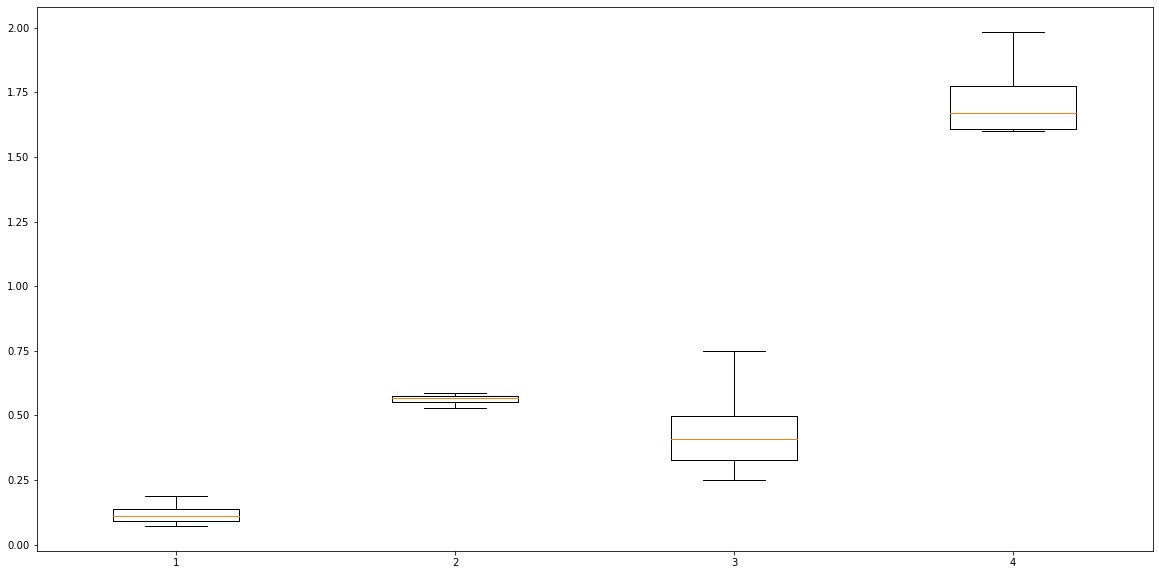

In [8]:
def make_boxplot(data_to_plot, y_axis_name, labels):
    
    x=[1,2,3,4]
    
    font_size = 20
    save_name = 'statistical_analysis_voxel_resampling'#name to be saved later on
    
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data_to_plot)
    
    plt.xticks(x, labels, rotation = 90, fontsize = font_size)
    plt. yticks(fontsize = font_size)
    
    ax.set_ylabel(y_axis_name, fontsize = font_size)
    ax.grid()
    #plt.savefig(save_name)
    return

data_to_plot = [df['carbon black'], df['active material'],df['active surface'],df['tortuosity']]
y_axis_name = df.columns.values[0]
labels = df.columns.values[3:]
make_boxplot(data_to_plot, y_axis_name, labels)